<a href="https://colab.research.google.com/github/Alton1998/Scoliosis/blob/main/ECE_710_Project_3_Scoliosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# imports
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Reading data from Google drive
scoliosis_df = pd.read_excel("/content/drive/MyDrive/Data - Project 3(1).xlsx")

In [ ]:
column_of_interest = [
                                                          'DOB',
                                           'Initial X-ray Date',
       'Initial Age at initial X-ray time versus the birthdate',
                                                          'Sex',
                                              'Brace Treatment',
                                                      'At rest',
                     'Max Scoliometer Standing for major curve',
                              'Inclinometer (Kyphosis)(T1/T12)',
                              'Inclinometer (lordosis)(T12/S2)',
                                                  'Risser sign',
                                            'Major Curve Angle',
                                              'Curve direction',
                                                 'Curve Number',
                                                 'Curve Length',
                                               'Curve Location',
                                 'Curve Classfication from TSC',
                                              'AVR Measurement',
                                     'No. of exercise sessions',
                                           'Major Curve change',
                                  'Progression/Non progression']

In [ ]:
scoliosis_df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,NaN,NaN,NaN,NaN,NaN,NaN,Height (cm),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Assigned Subject ID,DOB,Initial X-ray Date,Initial Age at initial X-ray time versus the b...,Sex,Brace Treatment,At rest,Max Scoliometer Standing for major curve,Inclinometer (Kyphosis)(T1/T12),Inclinometer (lordosis)(T12/S2),...,Curve Classfication from TSC,AVR Measurement,No. of exercise sessions,Major Curve change,Progression/Non progression,NaN,NaN,NaN,NaN,Comments
2,TSC19,2001-12-06 00:00:00,2016-04-16 00:00:00,14,M,No,171,18,NaN,NaN,...,3C-A2,7.6,8,12,P,NaN,NaN,NaN,NaN,NaN
3,TSC132,2002-08-11 00:00:00,2017-01-04 00:00:00,14,F,Yes,161,8,35,25,...,N3N4-C2,-10.5,12,0,NP,NaN,NaN,NaN,NaN,NaN
4,TSC140,2002-09-15 00:00:00,2016-11-01 00:00:00,14,F,No,154.9,-12,NaN,NaN,...,4C - B1,-6.4,8,4,NP,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Setting Column names
scoliosis_df.columns = scoliosis_df.iloc[1]

In [ ]:
# Dropping 0 and 1 row since its useless
scoliosis_df.drop([0,1],inplace=True)

In [ ]:
scoliosis_df

1,Assigned Subject ID,DOB,Initial X-ray Date,Initial Age at initial X-ray time versus the birthdate,Sex,Brace Treatment,At rest,Max Scoliometer Standing for major curve,Inclinometer (Kyphosis)(T1/T12),Inclinometer (lordosis)(T12/S2),...,Curve Classfication from TSC,AVR Measurement,No. of exercise sessions,Major Curve change,Progression/Non progression,NaN,NaN,NaN,NaN,Comments
2,TSC19,2001-12-06 00:00:00,2016-04-16 00:00:00,14,M,No,171,18,NaN,NaN,...,3C-A2,7.6,8,12,P,NaN,NaN,NaN,NaN,NaN
3,TSC132,2002-08-11 00:00:00,2017-01-04 00:00:00,14,F,Yes,161,8,35,25,...,N3N4-C2,-10.5,12,0,NP,NaN,NaN,NaN,NaN,NaN
4,TSC140,2002-09-15 00:00:00,2016-11-01 00:00:00,14,F,No,154.9,-12,NaN,NaN,...,4C - B1,-6.4,8,4,NP,NaN,NaN,NaN,NaN,NaN
5,TSC142,2001-07-31 00:00:00,2016-12-01 00:00:00,15,M,No,176,NaN,NaN,NaN,...,3C - A1,-5.1,8,-2,NP,NaN,NaN,NaN,NaN,NaN
6,TSC143,2000-09-21 00:00:00,2016-12-23 00:00:00,16,F,No,NaN,25,35,25,...,N3N4 - C1,-25.5,8,20,P,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
scoliosis_df.set_index('Assigned Subject ID',inplace=True)

In [ ]:
scoliosis_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, TSC19 to nan
Data columns (total 25 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   DOB                                                     290 non-null    object 
 1   Initial X-ray Date                                      289 non-null    object 
 2   Initial Age at initial X-ray time versus the birthdate  290 non-null    object 
 3   Sex                                                     292 non-null    object 
 4   Brace Treatment                                         292 non-null    object 
 5   At rest                                                 268 non-null    object 
 6   Max Scoliometer Standing for major curve                249 non-null    object 
 7   Inclinometer (Kyphosis)(T1/T12)                         255 non-null    object 
 8   Inclinometer (lordosis)(T12/S2)          

In [ ]:
scoliosis_df

1,DOB,Initial X-ray Date,Initial Age at initial X-ray time versus the birthdate,Sex,Brace Treatment,At rest,Max Scoliometer Standing for major curve,Inclinometer (Kyphosis)(T1/T12),Inclinometer (lordosis)(T12/S2),Risser sign,...,Curve Classfication from TSC,AVR Measurement,No. of exercise sessions,Major Curve change,Progression/Non progression,NaN,NaN,NaN,NaN,Comments
Assigned Subject ID,,,,,,,,,,,,,,,,,,,,,
TSC19,2001-12-06 00:00:00,2016-04-16 00:00:00,14,M,No,171,18,NaN,NaN,4,...,3C-A2,7.6,8,12,P,NaN,NaN,NaN,NaN,NaN
TSC132,2002-08-11 00:00:00,2017-01-04 00:00:00,14,F,Yes,161,8,35,25,NaN,...,N3N4-C2,-10.5,12,0,NP,NaN,NaN,NaN,NaN,NaN
TSC140,2002-09-15 00:00:00,2016-11-01 00:00:00,14,F,No,154.9,-12,NaN,NaN,1,...,4C - B1,-6.4,8,4,NP,NaN,NaN,NaN,NaN,NaN
TSC142,2001-07-31 00:00:00,2016-12-01 00:00:00,15,M,No,176,NaN,NaN,NaN,4,...,3C - A1,-5.1,8,-2,NP,NaN,NaN,NaN,NaN,NaN
TSC143,2000-09-21 00:00:00,2016-12-23 00:00:00,16,F,No,NaN,25,35,25,4,...,N3N4 - C1,-25.5,8,20,P,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
scoliosis_df = scoliosis_df[column_of_interest]

In [ ]:
# Droping NaN rows to avoid over fitting
scoliosis_df.dropna(inplace=True)

<ipython-input-13-38fc1de5bf74>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scoliosis_df.dropna(inplace=True)


In [ ]:
scoliosis_df

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:102: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  pd.Series(non_null_values)


1,DOB,Initial X-ray Date,Initial Age at initial X-ray time versus the birthdate,Sex,Brace Treatment,At rest,Max Scoliometer Standing for major curve,Inclinometer (Kyphosis)(T1/T12),Inclinometer (lordosis)(T12/S2),Risser sign,Major Curve Angle,Curve direction,Curve Number,Curve Length,Curve Location,Curve Classfication from TSC,AVR Measurement,No. of exercise sessions,Major Curve change,Progression/Non progression
Assigned Subject ID,,,,,,,,,,,,,,,,,,,,
TSC180,2003-06-12 00:00:00,2017-03-28 00:00:00,13,F,Yes,163.83,-12,32,57,3,32,L,2,7,L,4C(B1),-16.2,10,2,NP
TSC181,2001-02-13 00:00:00,2016-11-30 00:00:00,15,F,No,163.15,-5,65,50,4,38,L,1,6,L,Single TL - E2,22.4,7,-2,NP
TSC191,2003-10-06 00:00:00,2017-03-13 00:00:00,13,F,No,165.7,-10,26,20,5,35,L,1,6,TL,Single TL - E2,-12.1,3,-5,NP
TSC215,2005-07-21 00:00:00,2017-05-30 00:00:00,11,F,Yes,162.5,-8,40,45,0,28,L,2,8,TL,4C-B1,-7.4,13,-1,NP
TSC222,2003-06-01 00:00:00,2017-04-29 00:00:00,13,F,No,163.8,11,48,35,4,36,R,1,8,TH,N3N4 - C1,22.8,4,6,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TSC3004,2006-11-26 00:00:00,2022-10-21 00:00:00,15,M,Yes,171,-3,12,24,0,24,L,3,5,L,4C-B1,10,8,-4,NP
TSC3023,2005-08-26 00:00:00,2022-10-01 00:00:00,17,M,Yes,166,13,40,25,2,44,R,1,6,TH,3C-A2,-26.2,9,-3,NP
TSC3031,2009-12-13 00:00:00,2022-10-17 00:00:00,12,F,Yes,146,19,15,40,4,51,R,2,11,TH,3C-A3,17.3,8,-9,NP


In [ ]:
scoliosis_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, TSC180 to TSC3057
Data columns (total 20 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   DOB                                                     213 non-null    object
 1   Initial X-ray Date                                      213 non-null    object
 2   Initial Age at initial X-ray time versus the birthdate  213 non-null    object
 3   Sex                                                     213 non-null    object
 4   Brace Treatment                                         213 non-null    object
 5   At rest                                                 213 non-null    object
 6   Max Scoliometer Standing for major curve                213 non-null    object
 7   Inclinometer (Kyphosis)(T1/T12)                         213 non-null    object
 8   Inclinometer (lordosis)(T12/S2)               

In [ ]:
scoliosis_df = scoliosis_df.drop(["TSC802","TSC865"])

In [ ]:
# Setting the appropriate data types

scoliosis_df['DOB'] = pd.to_datetime(scoliosis_df['DOB'],format = "%Y-%m-%d %H:%M:%S")
scoliosis_df['Initial X-ray Date'] = pd.to_datetime(scoliosis_df['Initial X-ray Date'],format = "%Y-%m-%d %H:%M:%S")
scoliosis_df['Initial Age at initial X-ray time versus the birthdate'] = pd.to_numeric(scoliosis_df['Initial Age at initial X-ray time versus the birthdate'])
scoliosis_df['At rest'] = pd.to_numeric(scoliosis_df['At rest'])
scoliosis_df['Max Scoliometer Standing for major curve'] = pd.to_numeric(scoliosis_df['Max Scoliometer Standing for major curve'])
scoliosis_df['Inclinometer (Kyphosis)(T1/T12)'] = pd.to_numeric(scoliosis_df['Inclinometer (Kyphosis)(T1/T12)'])
scoliosis_df['Inclinometer (lordosis)(T12/S2)'] = pd.to_numeric(scoliosis_df['Inclinometer (lordosis)(T12/S2)'])
scoliosis_df['Risser sign'] = pd.to_numeric(scoliosis_df['Risser sign'])
scoliosis_df['Major Curve Angle'] = pd.to_numeric(scoliosis_df['Major Curve Angle'])
scoliosis_df['Curve Number'] = pd.to_numeric(scoliosis_df['Curve Number'])
scoliosis_df['Curve Length'] = pd.to_numeric(scoliosis_df['Curve Length'])
scoliosis_df['AVR Measurement'] = pd.to_numeric(scoliosis_df['AVR Measurement'])
scoliosis_df['No. of exercise sessions'] = pd.to_numeric(scoliosis_df['No. of exercise sessions'])
scoliosis_df['Major Curve change'] = pd.to_numeric(scoliosis_df['Major Curve change'])



In [ ]:
scoliosis_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211 entries, TSC180 to TSC3057
Data columns (total 20 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   DOB                                                     211 non-null    datetime64[ns]
 1   Initial X-ray Date                                      211 non-null    datetime64[ns]
 2   Initial Age at initial X-ray time versus the birthdate  211 non-null    int64         
 3   Sex                                                     211 non-null    object        
 4   Brace Treatment                                         211 non-null    object        
 5   At rest                                                 211 non-null    float64       
 6   Max Scoliometer Standing for major curve                211 non-null    float64       
 7   Inclinometer (Kyphosis)(T1/T12)                         21

In [ ]:
categorical_columns = ["Sex","Brace Treatment","Risser sign","Curve direction","Curve Number","Curve Location","Progression/Non progression","Curve Classfication from TSC (New)"]

In [ ]:
# Checking for near variance for most of our categorical columns
var_summary_df = pd.DataFrame(data={},columns=categorical_columns)

In [ ]:
var_summary_df

,Sex,Brace Treatment,Risser sign,Curve direction,Curve Number,Curve Location,Progression/Non progression,Curve Classfication from TSC (New)


In [ ]:
def cal_near_zero_var(col_name="Sex"):
  freqs = scoliosis_df[col_name].value_counts()
  max_vals = freqs.nlargest(2)
  return max_vals.iloc[0]/max_vals.iloc[1]

In [ ]:
# One hot encoding
sex_dummies = pd.get_dummies(scoliosis_df['Sex'])
brace_treatment_dummies = pd.get_dummies(scoliosis_df['Brace Treatment'])
risser_sign_dummies = pd.get_dummies(scoliosis_df["Risser sign"])
curve_direction_dummies = pd.get_dummies(scoliosis_df["Curve direction"])
curve_number_dummies = pd.get_dummies(scoliosis_df["Curve Number"])
curve_location_dummies = pd.get_dummies(scoliosis_df["Curve Location"])
progression_dummies = pd.get_dummies(scoliosis_df["Progression/Non progression"])

In [ ]:
sex_dummies

,F,M
Assigned Subject ID,,
TSC180,1,0
TSC181,1,0
TSC191,1,0
TSC215,1,0
TSC222,1,0
...,...,...
TSC3004,0,1
TSC3023,0,1
TSC3031,1,0


In [ ]:
# Changing Curve Classification
scoliosis_df["Curve Classfication from TSC (New)"] = scoliosis_df["Curve Classfication from TSC"].apply(lambda x : x[-2])

In [ ]:
var_summary_df.loc["Near Zero Var Cal"] = list(map(cal_near_zero_var,categorical_columns))

In [ ]:
var_summary_df # No vals are greater than 20

,Sex,Brace Treatment,Risser sign,Curve direction,Curve Number,Curve Location,Progression/Non progression,Curve Classfication from TSC (New)
Near Zero Var Cal,8.173913,1.221053,1.592593,1.048544,2.0,1.380282,4.275,1.014925


In [ ]:
curve_classification_dummies = pd.get_dummies(scoliosis_df['Curve Classfication from TSC (New)'])

In [ ]:
scoliosis_df['Curve Classfication from TSC (New)'].value_counts()

B    68
A    67
E    43
C    31
1     1
N     1
Name: Curve Classfication from TSC (New), dtype: int64

In [ ]:
sex_dummies = sex_dummies[sex_dummies.columns[:-1]]
brace_treatment_dummies = brace_treatment_dummies[brace_treatment_dummies.columns[:-1]]
risser_sign_dummies = risser_sign_dummies[risser_sign_dummies.columns[:-1]]
curve_direction_dummies = curve_direction_dummies[curve_direction_dummies.columns[:-1]]
curve_number_dummies = curve_number_dummies[curve_number_dummies.columns[:-1]]
curve_location_dummies = curve_location_dummies[curve_location_dummies.columns[:-1]]
progression_dummies = progression_dummies[progression_dummies.columns[:-1]]
curve_classification_dummies = curve_classification_dummies[curve_classification_dummies.columns[:-1]]

In [ ]:
scoliosis_summary = scoliosis_df.describe()

In [ ]:
scoliosis_summary.loc["var"] = list(map(lambda x : scoliosis_summary.loc["std"][x]**2,scoliosis_summary.columns))
scoliosis_summary.loc["IQR"] = list(map(lambda x : scoliosis_summary.loc["75%"][x]- scoliosis_summary.loc["25%"][x],scoliosis_summary.columns))
scoliosis_summary.loc["Q1 – (1.5)(IQR)"] = list(map(lambda x : scoliosis_summary.loc["25%"][x] - (1.5*scoliosis_summary.loc["IQR"][x]),scoliosis_summary.columns))
scoliosis_summary.loc["Q3 + (1.5)(IQR)"] = list(map(lambda x : scoliosis_summary.loc["75%"][x] + (1.5*scoliosis_summary.loc["IQR"][x]),scoliosis_summary.columns))

In [ ]:
# Checking near zero variance features
scoliosis_summary

1,Initial Age at initial X-ray time versus the birthdate,At rest,Max Scoliometer Standing for major curve,Inclinometer (Kyphosis)(T1/T12),Inclinometer (lordosis)(T12/S2),Risser sign,Major Curve Angle,Curve Number,Curve Length,AVR Measurement,No. of exercise sessions,Major Curve change
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,12.777251,157.379512,1.575829,34.478673,30.213270,1.857820,29.232227,1.900474,6.270142,-0.948815,6.331754,-0.751185
std,2.005387,12.218691,9.796206,10.532637,9.851614,1.764376,11.599594,0.665153,1.396598,11.517557,2.573470,8.579096
min,6.000000,114.300000,-18.000000,10.000000,6.000000,0.000000,10.000000,1.000000,4.000000,-27.600000,1.000000,-24.000000
25%,12.000000,152.400000,-6.000000,26.000000,25.000000,0.000000,21.000000,1.000000,5.000000,-8.700000,4.500000,-5.000000
50%,13.000000,158.000000,3.000000,35.000000,30.000000,2.000000,29.000000,2.000000,6.000000,-1.400000,6.000000,0.000000
75%,14.000000,164.500000,10.000000,40.000000,35.000000,4.000000,36.000000,2.000000,7.000000,7.650000,8.000000,4.000000
max,17.000000,187.960000,21.000000,75.000000,57.000000,5.000000,62.000000,3.000000,13.000000,27.800000,17.000000,41.000000
var,4.021575,149.296417,95.965651,110.936448,97.054299,3.113022,134.550575,0.442428,1.950485,132.654130,6.622749,73.600891
IQR,2.000000,12.100000,16.000000,14.000000,10.000000,4.000000,15.000000,1.000000,2.000000,16.350000,3.500000,9.000000


In [ ]:
# Checking for highly correlated features
scoliosis_df.corr()

<ipython-input-34-8d7d3a8c1fb2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  scoliosis_df.corr()


1,Initial Age at initial X-ray time versus the birthdate,At rest,Max Scoliometer Standing for major curve,Inclinometer (Kyphosis)(T1/T12),Inclinometer (lordosis)(T12/S2),Risser sign,Major Curve Angle,Curve Number,Curve Length,AVR Measurement,No. of exercise sessions,Major Curve change
1,,,,,,,,,,,,
Initial Age at initial X-ray time versus the birthdate,1.000000,0.674690,-0.080945,0.175059,-0.070376,0.542798,0.144099,0.122529,-0.253852,-0.012987,-0.018830,0.127651
At rest,0.674690,1.000000,-0.118317,0.229716,-0.029568,0.369371,0.076649,0.092366,-0.196703,-0.059401,0.036264,0.054523
Max Scoliometer Standing for major curve,-0.080945,-0.118317,1.000000,-0.090026,0.000350,-0.068525,0.232215,0.111515,0.277290,0.506628,0.053491,0.000723
Inclinometer (Kyphosis)(T1/T12),0.175059,0.229716,-0.090026,1.000000,0.474498,0.163063,-0.011944,-0.089006,-0.032788,0.019004,0.002019,0.124073
Inclinometer (lordosis)(T12/S2),-0.070376,-0.029568,0.000350,0.474498,1.000000,0.019286,0.019400,-0.026540,-0.041240,0.044192,0.075895,0.059007
Risser sign,0.542798,0.369371,-0.068525,0.163063,0.019286,1.000000,0.240809,0.097440,-0.090626,-0.029142,-0.069267,0.033807
Major Curve Angle,0.144099,0.076649,0.232215,-0.011944,0.019400,0.240809,1.000000,0.374556,0.095169,0.044019,0.076529,-0.196249
Curve Number,0.122529,0.092366,0.111515,-0.089006,-0.026540,0.097440,0.374556,1.000000,-0.165712,-0.018663,0.094492,0.015626
Curve Length,-0.253852,-0.196703,0.277290,-0.032788,-0.041240,-0.090626,0.095169,-0.165712,1.000000,0.228833,0.122012,-0.180111


In [ ]:
scoliosis_corr = scoliosis_df.corr()

<ipython-input-35-41aa3c4bd89e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  scoliosis_corr = scoliosis_df.corr()


<Axes: xlabel='1', ylabel='1'>

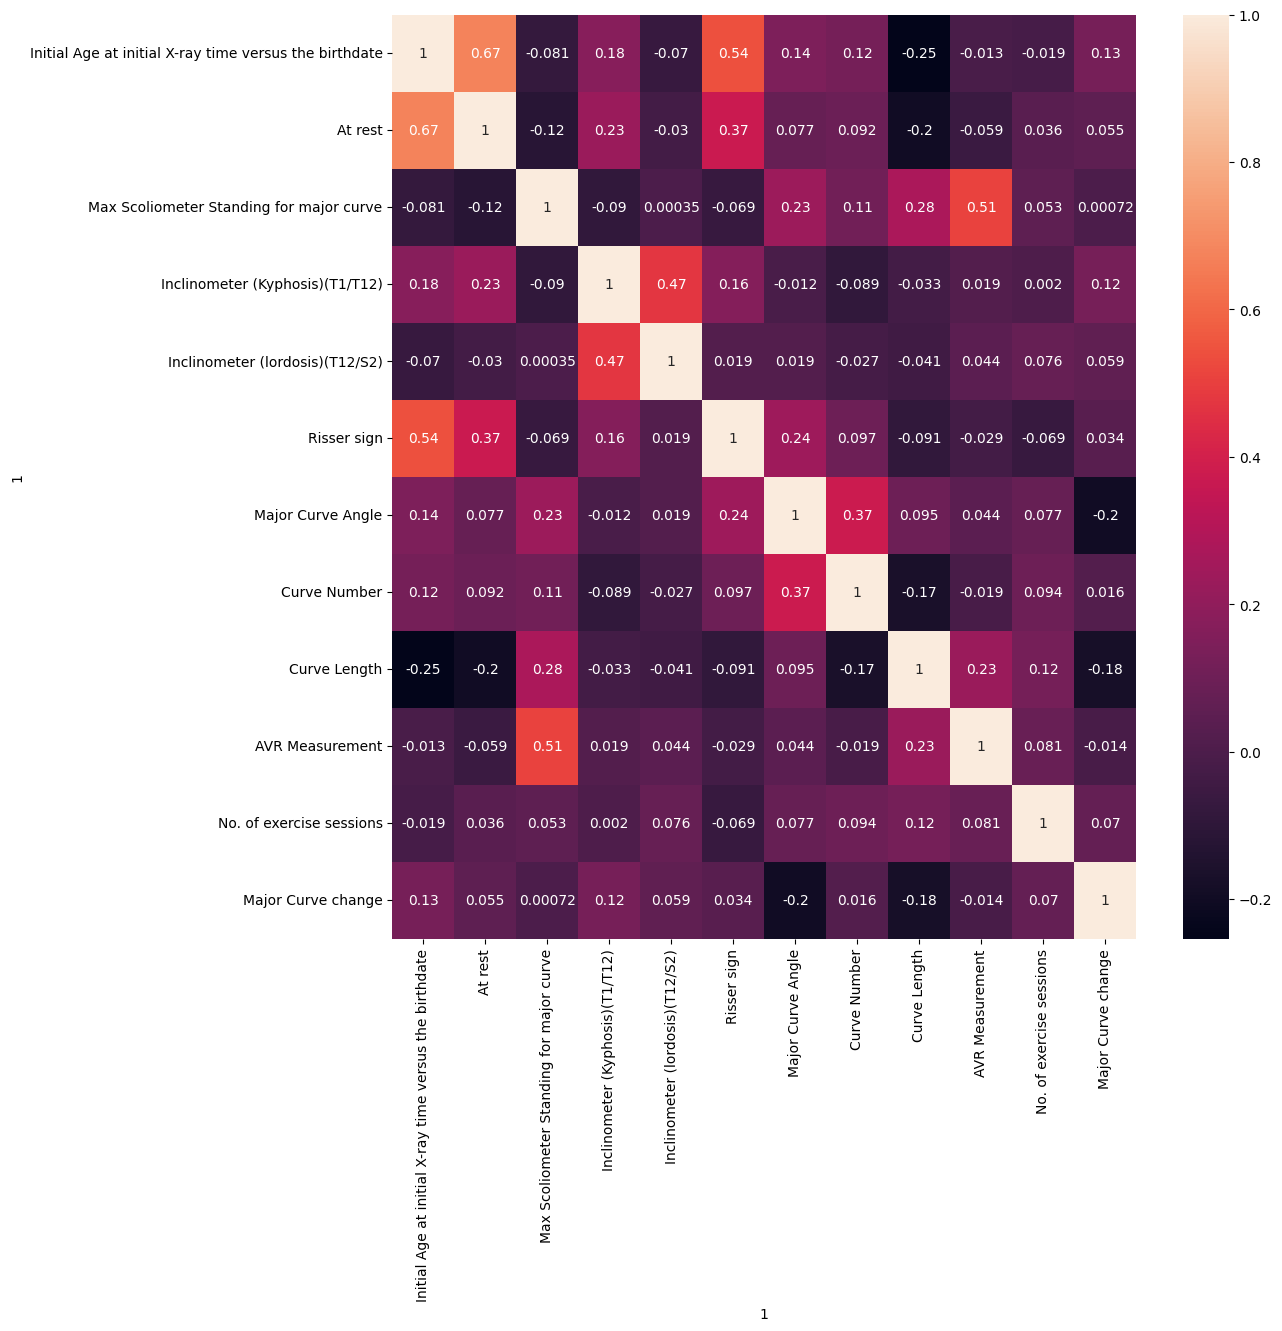

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(scoliosis_corr,annot=True)
# High correlation found b/w

# At rest, Initial age, Risser Sign

# Max Scoliomeyer Standing for major curve and AVR measurement
# But the degree looks to be not enough we assume highly correlated to be > 0.85

In [ ]:
# Replacing our categories with hot encoding done earlier

scoliosis_df_removed_categories = scoliosis_df.drop(["Sex","Brace Treatment","Risser sign","Curve direction","Curve Number","Curve Location","Curve Classfication from TSC (New)","Curve Classfication from TSC","Progression/Non progression"],axis=1)

In [ ]:
scoliosis_df_processed = pd.concat([scoliosis_df_removed_categories,sex_dummies,brace_treatment_dummies,risser_sign_dummies,curve_direction_dummies,curve_number_dummies,curve_location_dummies,curve_classification_dummies,progression_dummies],axis=1)

In [ ]:
scoliosis_df_processed = scoliosis_df_processed.drop(["DOB","Initial X-ray Date"],axis=1)
scoliosis_df_processed

,Initial Age at initial X-ray time versus the birthdate,At rest,Max Scoliometer Standing for major curve,Inclinometer (Kyphosis)(T1/T12),Inclinometer (lordosis)(T12/S2),Major Curve Angle,Curve Length,AVR Measurement,No. of exercise sessions,Major Curve change,...,L,TH,TL,TLT,1,A,B,C,E,NP
Assigned Subject ID,,,,,,,,,,,,,,,,,,,,,
TSC180,13,163.83,-12.0,32,57,32,7,-16.2,10,2.0,...,1,0,0,0,1,0,0,0,0,1
TSC181,15,163.15,-5.0,65,50,38,6,22.4,7,-2.0,...,1,0,0,0,0,0,0,0,1,1
TSC191,13,165.70,-10.0,26,20,35,6,-12.1,3,-5.0,...,0,0,1,0,0,0,0,0,1,1
TSC215,11,162.50,-8.0,40,45,28,8,-7.4,13,-1.0,...,0,0,1,0,0,0,1,0,0,1
TSC222,13,163.80,11.0,48,35,36,8,22.8,4,6.0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TSC3004,15,171.00,-3.0,12,24,24,5,10.0,8,-4.0,...,1,0,0,0,0,0,1,0,0,1
TSC3023,17,166.00,13.0,40,25,44,6,-26.2,9,-3.0,...,0,1,0,0,0,1,0,0,0,1
TSC3031,12,146.00,19.0,15,40,51,11,17.3,8,-9.0,...,0,1,0,0,0,1,0,0,0,1


In [ ]:
# Removing Outliers
continuous_columns = [x for x in scoliosis_summary.columns if x not in categorical_columns]
r1 = "Q1 – (1.5)(IQR)"
r2 = "Q3 + (1.5)(IQR)"
scoliosis_df_processed = scoliosis_df_processed[(scoliosis_df_processed[continuous_columns[0]] >= scoliosis_summary.loc[r1][continuous_columns[0]]) & (scoliosis_df_processed[continuous_columns[0]] <= scoliosis_summary.loc[r2][continuous_columns[0]]) &
(scoliosis_df_processed[continuous_columns[1]] >= scoliosis_summary.loc[r1][continuous_columns[1]]) & (scoliosis_df_processed[continuous_columns[1]] <= scoliosis_summary.loc[r2][continuous_columns[1]]) &
(scoliosis_df_processed[continuous_columns[2]] >= scoliosis_summary.loc[r1][continuous_columns[2]]) & (scoliosis_df_processed[continuous_columns[2]] <= scoliosis_summary.loc[r2][continuous_columns[2]]) &
(scoliosis_df_processed[continuous_columns[3]] >= scoliosis_summary.loc[r1][continuous_columns[3]]) & (scoliosis_df_processed[continuous_columns[3]] <= scoliosis_summary.loc[r2][continuous_columns[3]]) &
(scoliosis_df_processed[continuous_columns[4]] >= scoliosis_summary.loc[r1][continuous_columns[4]]) & (scoliosis_df_processed[continuous_columns[4]] <= scoliosis_summary.loc[r2][continuous_columns[4]]) &
(scoliosis_df_processed[continuous_columns[5]] >= scoliosis_summary.loc[r1][continuous_columns[5]]) & (scoliosis_df_processed[continuous_columns[5]] <= scoliosis_summary.loc[r2][continuous_columns[5]]) &
(scoliosis_df_processed[continuous_columns[6]] >= scoliosis_summary.loc[r1][continuous_columns[6]]) & (scoliosis_df_processed[continuous_columns[6]] <= scoliosis_summary.loc[r2][continuous_columns[6]]) &
(scoliosis_df_processed[continuous_columns[7]] >= scoliosis_summary.loc[r1][continuous_columns[7]]) & (scoliosis_df_processed[continuous_columns[7]] <= scoliosis_summary.loc[r2][continuous_columns[7]]) &
(scoliosis_df_processed[continuous_columns[8]] >= scoliosis_summary.loc[r1][continuous_columns[8]]) & (scoliosis_df_processed[continuous_columns[8]] <= scoliosis_summary.loc[r2][continuous_columns[8]]) &
(scoliosis_df_processed[continuous_columns[9]] >= scoliosis_summary.loc[r1][continuous_columns[9]]) & (scoliosis_df_processed[continuous_columns[9]] <= scoliosis_summary.loc[r2][continuous_columns[9]])]

In [ ]:
scoliosis_df_processed

,Initial Age at initial X-ray time versus the birthdate,At rest,Max Scoliometer Standing for major curve,Inclinometer (Kyphosis)(T1/T12),Inclinometer (lordosis)(T12/S2),Major Curve Angle,Curve Length,AVR Measurement,No. of exercise sessions,Major Curve change,...,L,TH,TL,TLT,1,A,B,C,E,NP
Assigned Subject ID,,,,,,,,,,,,,,,,,,,,,
TSC191,13,165.7,-10.0,26,20,35,6,-12.1,3,-5.0,...,0,0,1,0,0,0,0,0,1,1
TSC215,11,162.5,-8.0,40,45,28,8,-7.4,13,-1.0,...,0,0,1,0,0,0,1,0,0,1
TSC222,13,163.8,11.0,48,35,36,8,22.8,4,6.0,...,0,1,0,0,0,0,0,1,0,0
TSC232,15,172.7,-12.0,35,25,12,5,-6.9,8,1.0,...,1,0,0,0,0,0,0,0,1,1
TSC268,14,152.4,12.0,35,20,51,5,-19.4,5,8.0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TSC2956,12,156.8,-6.0,37,46,10,6,2.1,4,-4.0,...,1,0,0,0,0,0,0,0,1,1
TSC3004,15,171.0,-3.0,12,24,24,5,10.0,8,-4.0,...,1,0,0,0,0,0,1,0,0,1
TSC3023,17,166.0,13.0,40,25,44,6,-26.2,9,-3.0,...,0,1,0,0,0,1,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = scoliosis_df_processed.drop(["NP","Major Curve change"],axis=1)

In [ ]:
y_class = scoliosis_df_processed[["NP"]]

In [ ]:
y_reg = scoliosis_df_processed["Major Curve change"]

In [ ]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.30, random_state=42)

In [ ]:
X_train_reg, X_val_reg, y_train_reg, y_val_reg = train_test_split(X_train_reg, y_train_reg, test_size=0.1,random_state=42)

In [ ]:
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.30, random_state=42)

In [ ]:
X_train_class, X_val_class, y_train_class, y_val_class = train_test_split(X_train_class, y_train_class, test_size=0.1, random_state=42)

In [ ]:
import pickle

In [ ]:
# Dumping file so we can use in other code bases
with open("X_train_reg.pkl","wb") as f1, open("X_test_reg.pkl","wb") as f2, open("X_val_reg.pkl","wb") as f3, open("y_train_reg.pkl","wb") as f4, open("y_test_reg.pkl","wb") as f5, open("y_val_reg.pkl","wb") as f6,open("X_train_class.pkl","wb") as f7, open("X_test_class.pkl","wb") as f8, open("X_val_class.pkl","wb") as f9, open("y_train_class.pkl","wb") as f10, open("y_test_class.pkl","wb")  as f11, open("y_val_class.pkl","wb") as f12:
  pickle.dump(X_train_reg,f1)
  pickle.dump(X_test_reg,f2)
  pickle.dump(X_val_reg,f3)
  pickle.dump(y_train_reg,f4)
  pickle.dump(y_test_reg,f5)
  pickle.dump(y_val_reg,f6)
  pickle.dump(X_train_class,f7)
  pickle.dump(X_test_class,f8)
  pickle.dump(X_val_class,f9)
  pickle.dump(y_train_class,f10)
  pickle.dump(y_test_class,f11)
  pickle.dump(y_val_class,f12)